#BUSINESS SALES PERFORMANCE ANALYTICS OF AN ONLINE RETAIL STORE

#Business Understanding

This project focuses on analyzing historical sales data to gain a clear understanding of the business’s overall sales performance. By examining revenue trends, product and category performance, and regional contributions, the analysis aims to transform raw transactional data into meaningful insights that support informed business decision-making. The outcome of this analysis will provide stakeholders with a comprehensive view of key performance drivers and highlight opportunities to improve sales strategy and business outcomes.

##Problem Statement

The business currently lacks a consolidated and clear view of its sales performance across products, categories, time periods, and regions. While transactional sales data is available, it has not been systematically analyzed to uncover revenue trends, identify top-performing and underperforming products, or evaluate regional contributions to overall performance. As a result, decision-makers have limited visibility into the key drivers of revenue growth and potential improvement areas, making it difficult to take data-driven actions to optimize sales strategy and business performance.

##Objectives

1. Assess overall sales performance by analyzing total revenue, profit, and order trends over time to understand business growth patterns.


2. Identify top-performing and underperforming products and categories based on revenue and profitability to support product and inventory strategy decisions.

3. Analyze regional sales performance to determine which regions contribute most to revenue and which areas present growth or optimization opportunities.

4. Evaluate key business KPIs such as revenue growth rate, average order value, and profit margin to measure operational efficiency and sales effectiveness.



##Research questions

1. How has revenue changed over time (monthly and quarterly trends)?

2. Which products and categories contribute the most to total revenue and profit?

3. Which regions generate the highest and lowest sales?

4. Are there identifiable growth opportunities or underperforming segments?

5. What factors are driving overall business performance?

##Success criteria

1. A clean and analysis-ready dataset with clearly defined metrics such as revenue, profit, and time-based features.

2. A client-ready interactive dashboard that clearly presents key KPIs, trends, and performance comparisons.

3. Clearly articulated business insights that explain what is happening in the data (not just visualizations).

4. Actionable recommendations that stakeholders can use to improve sales performance.


# Data Understanding

In [45]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Importing dataset
data = pd.read_csv('/content/online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [47]:
#Checking columns and rows
data.shape

(541909, 8)

The dataset contains 541909 rows and 8 columns

In [48]:
#Checking columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
# Clean whitespace first
data['InvoiceDate'] = data['InvoiceDate'].astype(str).str.strip()

# Convert to datetime using mixed format
data['InvoiceDate'] = pd.to_datetime(
    data['InvoiceDate'],
    format='mixed',
    errors='coerce'
)


In [50]:
#Making sure that Quantity and UnitPrice are numeric
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [52]:
#checking details of the dataset
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


I was able to see the summary of statistics like the mean,standard deviation etc from this dataset across numerical columns.

#Data Cleaning

In [53]:
#Checking for missing values
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


We can see that we have missing values in 2 columns which are Description and CustomerID

In [54]:
#Checking the data types of the dataset
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


We can see that data types in customerID is numerical while on Description lies under categorical data.

In [55]:
#Checking the missing values in the two columns
data[['CustomerID', 'Description']].isna().sum()


,0
CustomerID,135080
Description,1454


In [56]:
#Checking the percentage of the missing values in the two columns
missing_percent = data.isna().sum() / len(data) * 100
missing_percent


,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


Since the percentage of the missing values in the description column is low I decided to drop the rows with the missing values

In [57]:
#Dropping rows with missing values in the Description column
data = data.dropna(subset=['Description'])


Since the percentage of the missing values in the CustomerID column is above 20% instead of dropping the rows since it might contain valuable data, I handled it by labeling it 'Unknown'.

In [58]:
data['CustomerID'] = data['CustomerID'].fillna('Unknown')


In [59]:
#checking whether missing values were handled
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [60]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Since revenue is important for our analysis I decided to create a revenue column

In [61]:
#Creating Revenue column
data['Revenue'] = data['Quantity'] * data['UnitPrice']


In [62]:
#Checking the revenue column
data[['Quantity', 'UnitPrice', 'Revenue']].head()


,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [63]:
#Checking for negative revenue
df = data[data['Revenue'] < 0]

There is not any negative revenue in the data.

In [64]:
# Filter cancelled orders
cancelled_orders = data[data['InvoiceNo'].str.startswith('C', na=False)]

# Check the first few rows
cancelled_orders.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


In [65]:
print("Number of cancelled orders:", len(cancelled_orders))


Number of cancelled orders: 9288


Since there are cancelled orders I will separate it from the completed sales

In [66]:
# Cancelled orders (InvoiceNo starts with 'C')
df_cancelled = data[data['InvoiceNo'].str.startswith('C', na=False)]

# Completed sales (InvoiceNo does NOT start with 'C')
df_sales = data[~data['InvoiceNo'].str.startswith('C', na=False)]


In [67]:
#Checking revenue for completed sales
df_sales.loc[:, 'Revenue'] = df_sales['Quantity'] * df_sales['UnitPrice']
df_sales[['Quantity', 'UnitPrice', 'Revenue']].head()



,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


##Feature engineering

In [68]:
#Extracting months,year and quater
df_sales.loc[:, 'Month'] = df_sales['InvoiceDate'].dt.month
df_sales.loc[:, 'Year'] = df_sales['InvoiceDate'].dt.year
df_sales.loc[:, 'Quarter'] = df_sales['InvoiceDate'].dt.quarter



/tmp/ipython-input-1480132547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.loc[:, 'Month'] = df_sales['InvoiceDate'].dt.month
/tmp/ipython-input-1480132547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.loc[:, 'Year'] = df_sales['InvoiceDate'].dt.year
/tmp/ipython-input-1480132547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [69]:
#Checking if the columns were added
df_sales[['InvoiceDate', 'Month', 'Year', 'Quarter']].tail()


,InvoiceDate,Month,Year,Quarter
541904,2011-12-09 12:50:00,12,2011,4
541905,2011-12-09 12:50:00,12,2011,4
541906,2011-12-09 12:50:00,12,2011,4
541907,2011-12-09 12:50:00,12,2011,4
541908,2011-12-09 12:50:00,12,2011,4


After doing that I will start working on the Key Performance Indicators(KPIs)

In [70]:
#Total Revenue
total_revenue = df_sales['Revenue'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 10644560.423999999


This is how much money the business generated from completed sales

In [71]:
#Number of orders
total_orders = df_sales['InvoiceNo'].nunique()
print("Total Orders:", total_orders)


Total Orders: 20610


This is the sales volume

In [72]:
#Average order value
aov = df_sales.groupby('InvoiceNo')['Revenue'].sum().mean()
print("Average Order Value:", aov)


Average Order Value: 516.47551790393


This is the amount of money a customer spends per order on average

In [73]:
#Revenue trend over time
monthly_revenue = (
    df_sales
    .groupby(['Year', 'Month'], as_index=False)['Revenue']
    .sum()
)
print(monthly_revenue)

    Year  Month      Revenue
0   2010     12   823746.140
1   2011      1   691364.560
2   2011      2   523631.890
3   2011      3   717639.360
4   2011      4   537808.621
5   2011      5   770536.020
6   2011      6   761739.900
7   2011      7   719221.191
8   2011      8   737014.260
9   2011      9  1058590.172
10  2011     10  1154979.300
11  2011     11  1509496.330
12  2011     12   638792.680


In [74]:
monthly_revenue.shape


(13, 3)

In [75]:
#Top selling products by revenue over time


In [76]:
#Revenue by country
country_revenue = (
    df_sales
    .groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

print(country_revenue)


Country
United Kingdom          9003097.964
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

This would help to identify strong or weak markets

In [77]:
#Cancelled orders impact
cancelled_revenue = df_cancelled['Revenue'].sum()
print("Revenue Lost (Cancelled Orders):", cancelled_revenue)


Revenue Lost (Cancelled Orders): -896812.49


The dataset does not contain cost-related variables such as production, logistics, or operational expenses. To approximate profitability, an estimated gross profit is calculated using an assumed average gross margin of 30%, which is typical for retail and wholesale businesses. This estimated profit is used for comparative and trend analysis only.

#EDA

##Univariate Analysis

In [78]:
monthly_revenue.head()
monthly_revenue.tail()
monthly_revenue.shape



(13, 3)

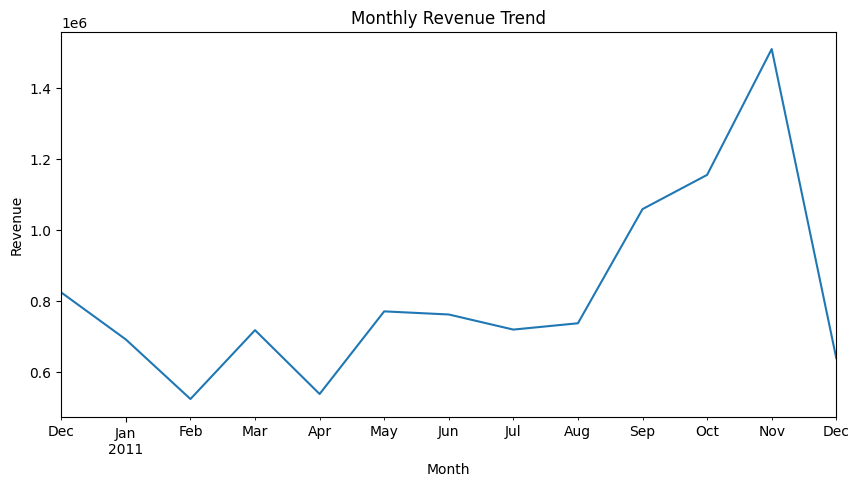

In [80]:
#Monthly Revenue Trend
monthly_revenue = (
    df_sales
    .groupby(df_sales['InvoiceDate'].dt.to_period('M'))['Revenue']
    .sum()
)

monthly_revenue.plot(
    title="Monthly Revenue Trend",
    figsize=(10, 5)
)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

The monthly revenue trend reveals clear seasonality in sales performance. Revenue declines in the early months of the year, reaching its lowest point around February, likely reflecting post-holiday demand slowdown. From March to August, revenue remains relatively stable with moderate fluctuations, indicating consistent baseline sales. A strong upward trend is observed from September through November, with November recording the highest revenue, suggesting seasonal demand or promotional impact. The sharp decline observed in the final month is likely due to incomplete data rather than an actual drop in business performance.

In [81]:
#Checking invoices in March
df_sales['InvoiceDate'].dt.month.value_counts().sort_index()


,count
InvoiceDate,
1,34332
2,27167
3,35884
4,29131
5,36271
6,36072
7,38678
8,34534
9,49322


Due to the nature of the plot I went ahead to check whether March has less records compared to the other months.

<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Description'>

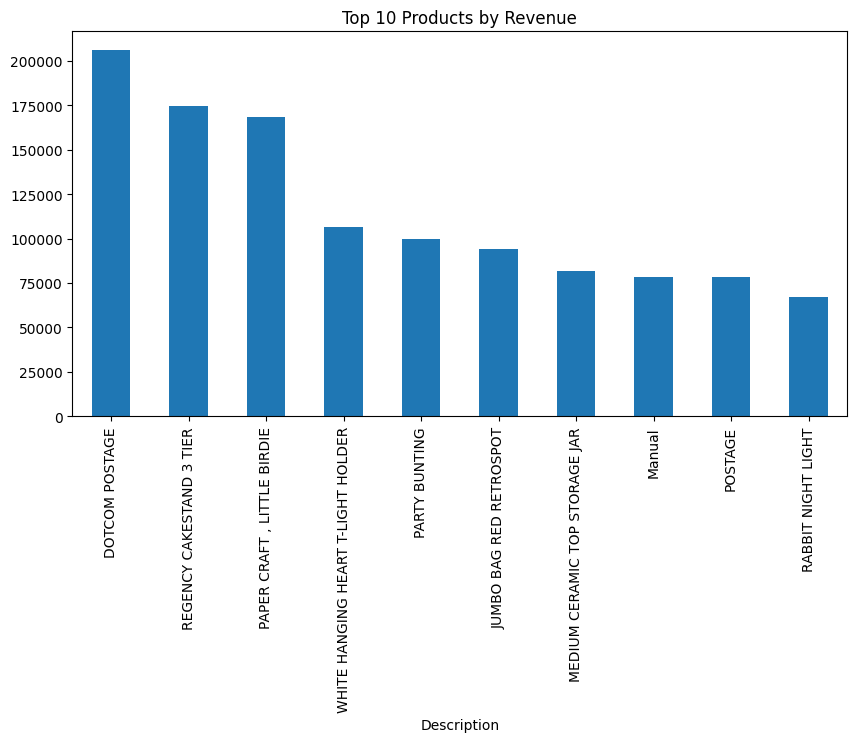

In [82]:
top_products = (
    df_sales
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(
    kind='bar',
    title="Top 10 Products by Revenue",
    figsize=(10, 5)
)


The analysis of the top 10 products by revenue reveals that sales are heavily concentrated among a small number of products. The Medium Ceramic Top Storage Jar leads significantly, followed by the Regency Cake Stand 3 Tier and Dotcom Postage. This indicates a classic long-tail sales pattern, where a few products generate the majority of revenue. From a business perspective, focusing inventory management and marketing efforts on these high-performing products could significantly improve overall revenue.

<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

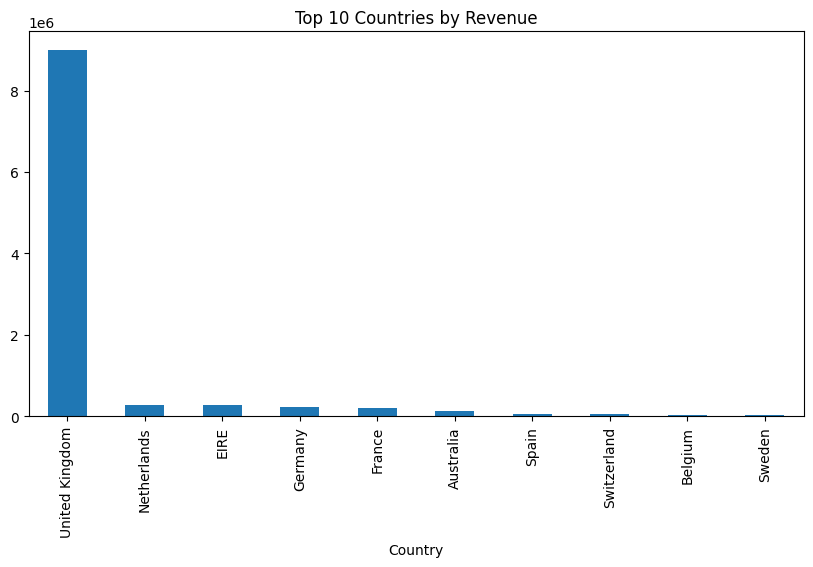

In [83]:
country_revenue = (
    df_sales
    .groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue.plot(
    kind='bar',
    title="Top 10 Countries by Revenue",
    figsize=(10, 5)
)


The country-level revenue analysis shows that the United Kingdom is the dominant market, contributing the vast majority of total revenue. There is a sharp decline in revenue after the UK, with countries such as the Netherlands, EIRE, and Germany contributing significantly smaller amounts. This highlights a strong market concentration and suggests potential growth opportunities through strategic expansion into international markets to reduce dependency on a single country.

<Axes: title={'center': 'Distribution of Order Values'}, ylabel='Frequency'>

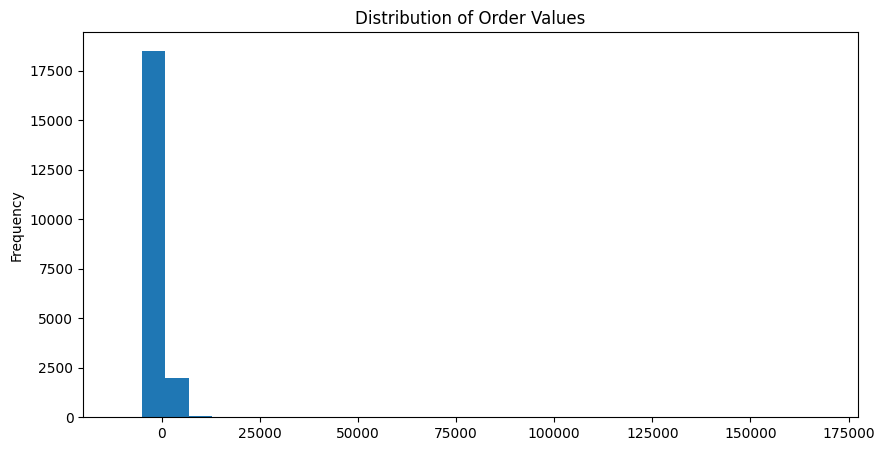

In [84]:
order_value = df_sales.groupby('InvoiceNo')['Revenue'].sum()

order_value.plot(
    kind='hist',
    bins=30,
    title="Distribution of Order Values",
    figsize=(10, 5)
)


The distribution of order values is heavily right-skewed, with the majority of transactions having low monetary values. A small number of high-value orders create a long right tail, indicating the presence of outliers. This suggests that while most customers place small orders, a minority of transactions contribute significantly to total revenue. Appropriate handling of outliers is important for downstream analysis and modeling.

In [85]:
#
df_tableau = df_sales.copy()


In [87]:
file_path = "clean_sales_data_for_tableau.csv"
df_tableau.to_csv(file_path, index=False)



In [88]:
#Downloading the file from colab
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusions

1. Revenue shows a declining monthly trend;
The monthly revenue analysis indicates a steady decline over the observed period, with a sharp drop toward the later months.
This suggests possible seasonality effects, reduced customer activity, or incomplete data coverage in the final month.
2. Revenue is highly concentrated in a small number of products;
A limited set of products contributes a disproportionately large share of total revenue.
This highlights a strong dependency on top-performing products, increasing business risk if demand for these products declines.
3. Revenue is heavily dominated by one market;
The United Kingdom accounts for the vast majority of total revenue.
Other countries contribute relatively small portions, indicating limited international market penetration.
4. Order values are highly right-skewed;
Most transactions are of low value, while a small number of very high-value orders significantly impact total revenue.
This suggests the presence of bulk buyers or wholesale customers, alongside a larger base of regular retail customers.
5. Cancelled orders represent lost revenue;
Cancelled transactions reduce realized revenue and may signal issues related to pricing, stock availability, or customer experience.

#Recommendations

1. Investigate revenue decline drivers
Analyze seasonality, promotions, stock availability, and customer activity to understand the cause of declining revenue.Ensure incomplete months are handled carefully in future reporting to avoid misleading trends.
2. Diversify product revenue streams;
Reduce reliance on a small number of top-selling products by:
Promoting mid-performing products,Bundling low-selling items with bestsellers and Exploring product lifecycle performance.
3. Expand international market strategy;Target high-potential countries outside the UK with tailored marketing, localized pricing, or shipping incentives.
Conduct country-level profitability analysis to identify markets worth deeper investment.
4. Segment customers by purchasing behavior by creating customer segments such as:
Low-value frequent buyers
High-value bulk purchasers
Use this segmentation to design personalized promotions, loyalty programs, and pricing strategies
5. Analyze cancellation reasons to identify operational issues such as:
Inventory shortages
Pricing errors
Delivery delays
Implement proactive measures to reduce cancellations and recover potential revenue.